# Titanic EDA

### From Example

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


In [2]:
titanic_df = pd.read_csv('BookData\\titanictrain.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
titanic_df.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

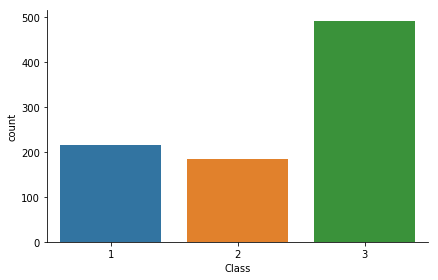

In [7]:
fg = sns.factorplot('Pclass', data=titanic_df, kind='count', aspect=1.5)
fg.set_xlabels('Class')

In [8]:
titanic_df.groupby('Sex')['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

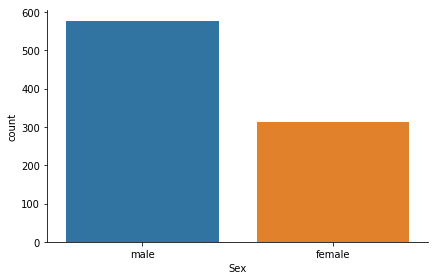

In [9]:
sns.factorplot('Sex', data=titanic_df, kind='count', aspect=1.5)

In [10]:
titanic_df.groupby(['Sex', 'Pclass'])['Sex'].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Sex, dtype: int64

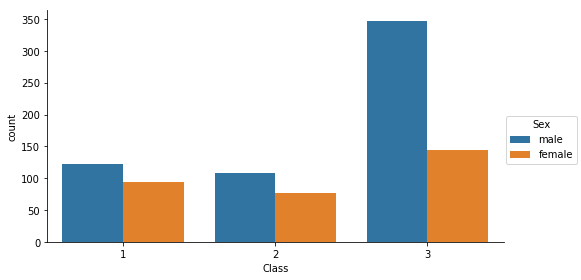

In [11]:
g = sns.factorplot('Pclass', data=titanic_df, hue='Sex', kind='count', aspect=1.75)
g.set_xlabels('Class')

In [12]:
titanic_df.pivot_table('Survived', 'Sex', 'Pclass', aggfunc=np.sum, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,91,70,72,233
male,45,17,47,109
All,136,87,119,342


In [13]:
not_survived = titanic_df[titanic_df['Survived']==0]

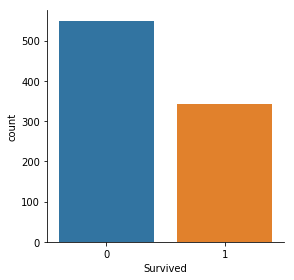

In [14]:
sns.factorplot('Survived', data=titanic_df, kind='count')

In [15]:
len(not_survived)

549

In [16]:
not_survived.pivot_table('Survived', 'Sex', 'Pclass', aggfunc=len, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,3,6,72,81
male,77,91,300,468
All,80,97,372,549


In [17]:
table = pd.crosstab(index=[titanic_df.Survived,titanic_df.Pclass], columns=[titanic_df.Sex,titanic_df.Embarked])

In [18]:
table.unstack()

Sex      female                              male                           \
Embarked      C         Q          S            C         Q          S       
Pclass        1  2   3  1  2   3   1   2   3    1  2   3  1  2   3   1   2   
Survived                                                                     
0             1  0   8  0  0   9   2   6  55   25  8  33  1  1  36  51  82   
1            42  7  15  1  2  24  46  61  33   17  2  10  0  0   3  28  15   

Sex            
Embarked       
Pclass      3  
Survived       
0         231  
1          34

In [19]:
table.columns, table.index

(MultiIndex(levels=[['female', 'male'], ['C', 'Q', 'S']],
            labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
            names=['Sex', 'Embarked']), MultiIndex(levels=[[0, 1], [1, 2, 3]],
            labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
            names=['Survived', 'Pclass']))

In [20]:
table.columns.set_levels(['Female', 'Male'], level=0, inplace=True)
table.columns.set_levels(['Cherbourg','Queenstown','Southampton'], level=1, inplace=True)
table

Sex                Female                             Male             \
Embarked        Cherbourg Queenstown Southampton Cherbourg Queenstown   
Survived Pclass                                                         
0        1              1          0           2        25          1   
         2              0          0           6         8          1   
         3              8          9          55        33         36   
1        1             42          1          46        17          0   
         2              7          2          61         2          0   
         3             15         24          33        10          3   

Sex                          
Embarked        Southampton  
Survived Pclass              
0        1               51  
         2               82  
         3              231  
1        1               28  
         2               15  
         3               34

In [21]:
print('Average and median age of passengers are %0.f and %0.f years old, respectively'%(titanic_df.Age.mean(), 
                                                                          titanic_df.Age.median()))

Average and median age of passengers are 30 and 28 years old, respectively


In [22]:
titanic_df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [23]:
age = titanic_df['Age'].dropna()

Text(0.5,1,"Distribution of Passengers' Ages")

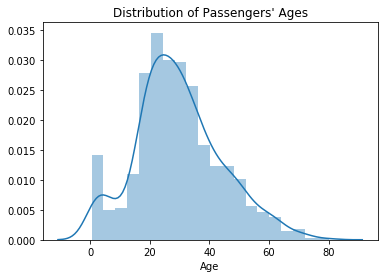

In [24]:
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Passengers' Ages")

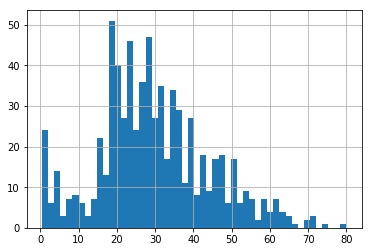

In [25]:
titanic_df['Age'].hist(bins=50)

In [26]:
titanic_df['Parch'].dtype, titanic_df['SibSp'].dtype, len(titanic_df.Cabin.dropna())

(dtype('int64'), dtype('int64'), 204)

In [27]:
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [28]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [29]:
titanic_df[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


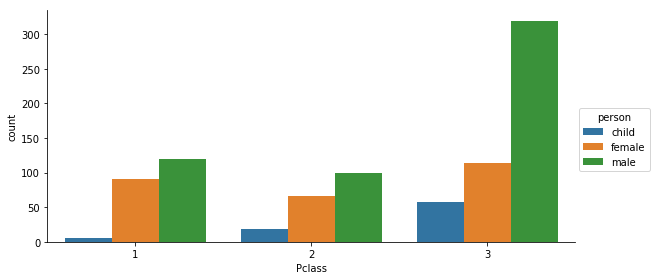

In [30]:
sns.factorplot('Pclass', data=titanic_df, kind='count', hue='person', order=[1,2,3], 
               hue_order=['child','female','male'], aspect=2)

In [31]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

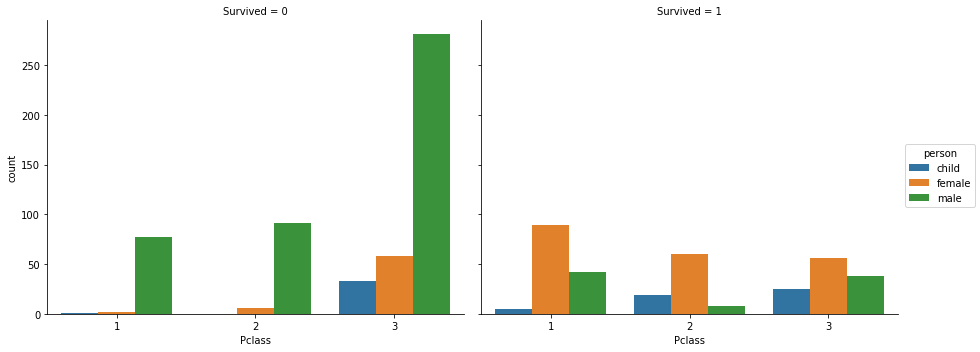

In [32]:
sns.factorplot('Pclass', data=titanic_df, kind='count', hue='person', col='Survived', order=[1,2,3], 
               hue_order=['child','female','male'], aspect=1.25, size=5)

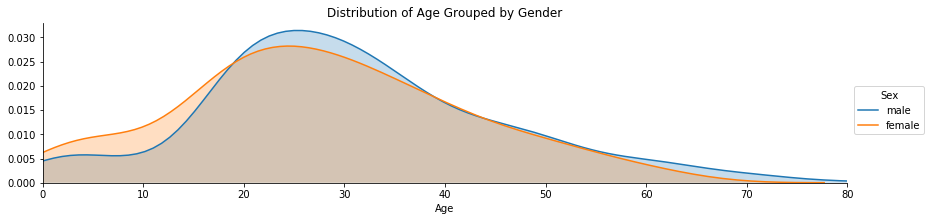

In [33]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

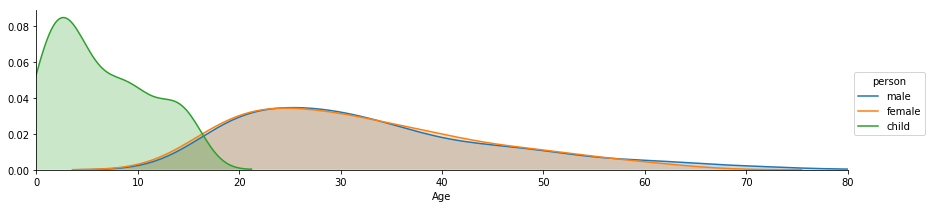

In [34]:
fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

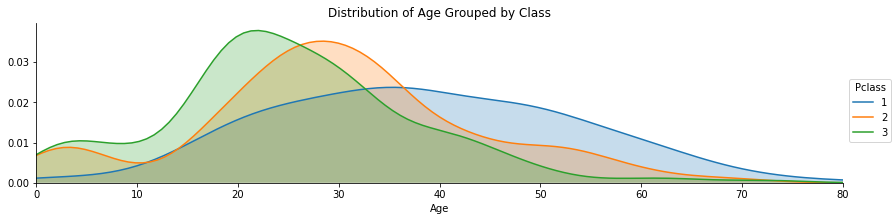

In [35]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Class')
fig.add_legend()

In [36]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [37]:
d = []
for c in deck:
    d.append(c[0])

In [38]:
d[0:10]

['C', 'C', 'E', 'G', 'C', 'D', 'A', 'C', 'B', 'D']

In [39]:
from collections import Counter
Counter(d)

Counter({'A': 15, 'B': 47, 'C': 59, 'D': 33, 'E': 32, 'F': 13, 'G': 4, 'T': 1})

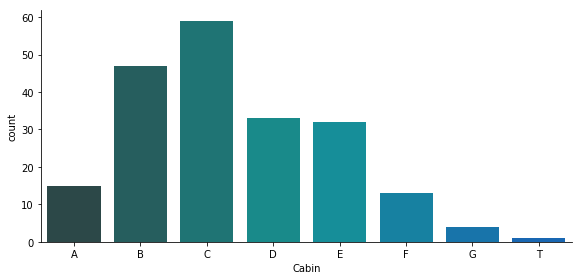

In [40]:
cabin_df = DataFrame(d)
cabin_df.columns=['Cabin']
sns.factorplot('Cabin', data=cabin_df, kind='count', order=['A','B','C','D','E','F','G','T'], aspect=2, 
              palette='winter_d')

In [41]:
cabin_df = cabin_df[cabin_df['Cabin'] != 'T']

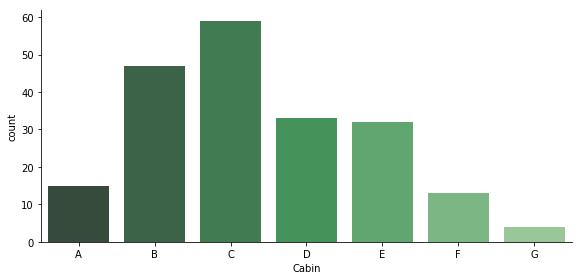

In [42]:
sns.factorplot('Cabin', data=cabin_df, kind='count', order=['A','B','C','D','E','F','G'], aspect=2, 
              palette='Greens_d')

In [43]:
url = 'http://matplotlib.org/api/pyplot_summary.html?highlight=colormaps#matplotlib.pyplot.colormaps'
import webbrowser
webbrowser.open(url)

True

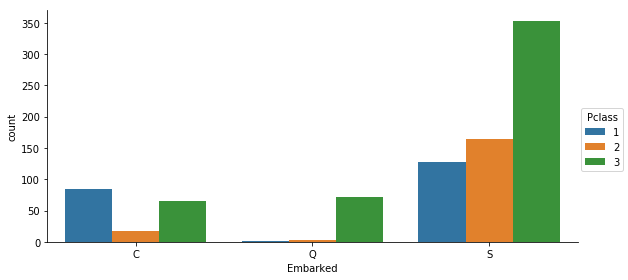

In [44]:
sns.factorplot('Embarked', data=titanic_df, kind='count', hue='Pclass', hue_order=range(1,4), aspect=2,
              order = ['C','Q','S'])

In [45]:
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [46]:
port = pd.crosstab(index=[titanic_df.Pclass], columns=[titanic_df.Embarked])
port.columns = [['Cherbourg','Queenstown','Southampton']]

In [47]:
port

,Cherbourg,Queenstown,Southampton
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


In [48]:
port.index

Int64Index([1, 2, 3], dtype='int64', name='Pclass')

In [49]:
port.columns

MultiIndex(levels=[['Cherbourg', 'Queenstown', 'Southampton']],
           labels=[[0, 1, 2]])

In [50]:
port.index=[['First','Second','Third']]

In [51]:
port

,Cherbourg,Queenstown,Southampton
First,85,2,127
Second,17,3,164
Third,66,72,353


In [52]:
titanic_df[['SibSp','Parch']].head()

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0


In [53]:
alone_df = titanic_df[(titanic_df['SibSp'] == 0) & (titanic_df['Parch']==0)]
alone_df['Alone'] = 'Alone'
not_alone_df = titanic_df[(titanic_df['SibSp'] != 0) | (titanic_df['Parch']!=0)]
not_alone_df['Alone'] = 'With family'

comb = [alone_df, not_alone_df]
titanic_df = pd.concat(comb).sort_index()


C:\Users\PRoman5\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\PRoman5\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [54]:
[len(alone_df), len(not_alone_df)]

[537, 354]

In [55]:
alone_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone


In [56]:
not_alone_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With family


In [57]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


In [58]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

C:\Users\PRoman5\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


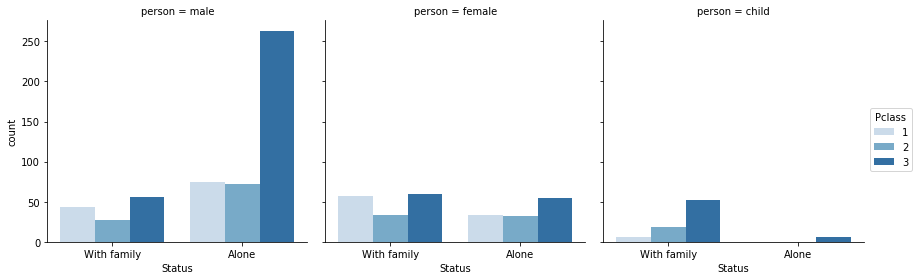

In [59]:
fg=sns.factorplot('Alone', data=titanic_df, kind='count', hue='Pclass', col='person', hue_order=range(1,4),
                 palette='Blues')
fg.set_xlabels('Status')

In [60]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

In [61]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


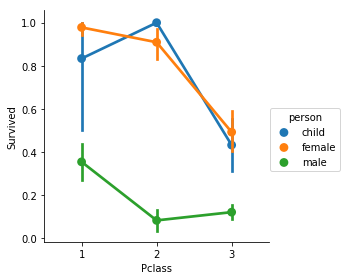

In [62]:
sns.factorplot('Pclass','Survived', hue='person', data=titanic_df, order=range(1,4), 
               hue_order = ['child','female','male'])

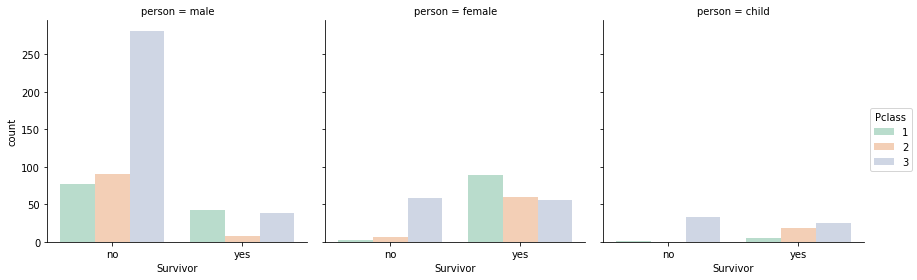

In [63]:
sns.factorplot('Survivor', data=titanic_df, hue='Pclass', kind='count', palette='Pastel2', hue_order=range(1,4),
              col='person')

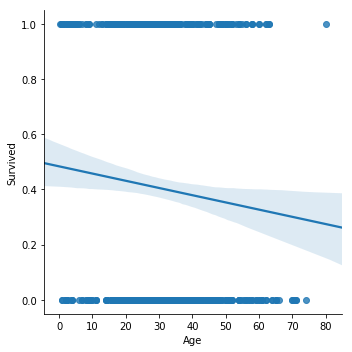

In [64]:
sns.lmplot('Age', 'Survived', data=titanic_df)

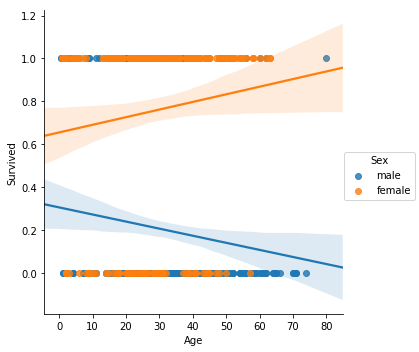

In [65]:
sns.lmplot('Age', 'Survived', data=titanic_df, hue='Sex')

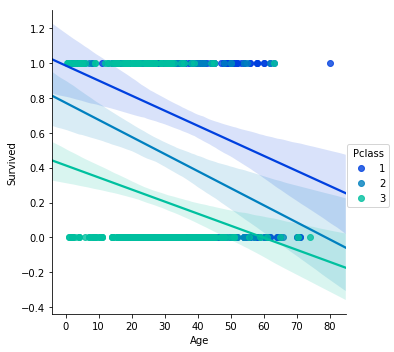

In [66]:
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='winter', hue_order=range(1,4))

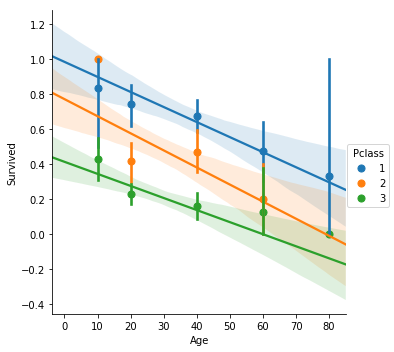

In [67]:
generations = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,x_bins=generations, hue_order=[1,2,3])

In [68]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'person', 'Alone',
       'Survivor'],
      dtype='object')

In [69]:
titanic_DF = titanic_df.dropna(subset=['Cabin'])

In [70]:
d[0:10]

['C', 'C', 'E', 'G', 'C', 'D', 'A', 'C', 'B', 'D']

In [71]:
len(titanic_DF), len(d)

(204, 204)

In [72]:
titanic_DF['Deck'] = d

C:\Users\PRoman5\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
titanic_DF = titanic_DF[titanic_DF.Deck != 'T']

In [74]:
titanic_DF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family,yes,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family,yes,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,With family,yes,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,yes,C


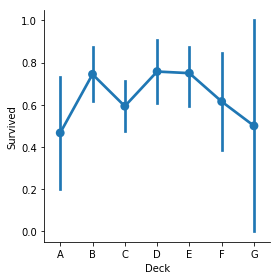

In [75]:
sns.factorplot('Deck', 'Survived', data=titanic_DF, order=['A','B','C','D','E','F','G'])

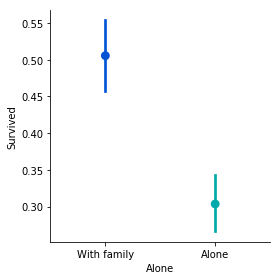

In [76]:
sns.factorplot('Alone', 'Survived', data=titanic_df, palette='winter') #hue='person', 
               #hue_order=['child', 'female', 'male'])

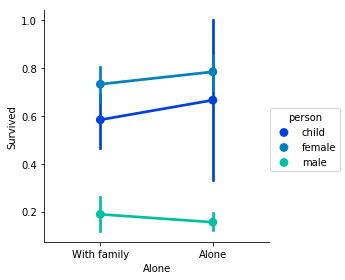

In [77]:
sns.factorplot('Alone', 'Survived', data=titanic_df, palette='winter', hue='person', 
               hue_order=['child', 'female', 'male'])

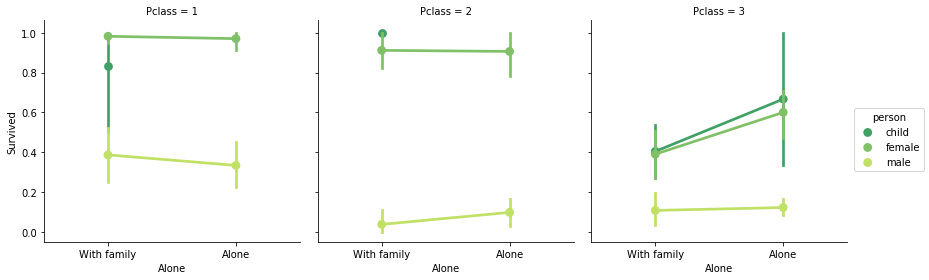

In [78]:
sns.factorplot('Alone', 'Survived', data=titanic_df, palette='summer', hue='person', 
               hue_order=['child', 'female', 'male'], col='Pclass', col_order=[1,2,3])

### From Plan of Attack Approach

In [79]:
import pandas as pd

In [80]:
titanic = pd.read_csv('BookData\\titanic.csv', header=0)

In [81]:
titanic.head()

,Unnamed: 0,pclass,survived,sex,age,sibsp,parch
0,1,1st,survived,female,29.0000,0,0
1,2,1st,survived,male,0.9167,1,2
2,3,1st,died,female,2.0000,1,2
3,4,1st,died,male,30.0000,1,2
4,5,1st,died,female,25.0000,1,2


In [82]:
titanic.describe()

,Unnamed: 0,age,sibsp,parch
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2032.843901,0.498854,0.385027
std,378.020061,3996.032876,1.041658,0.865560
min,1.000000,0.166700,0.000000,0.000000
25%,328.000000,22.000000,0.000000,0.000000
50%,655.000000,32.000000,0.000000,0.000000
75%,982.000000,55.000000,1.000000,0.000000
max,1309.000000,9999.000000,8.000000,9.000000


In [83]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
Unnamed: 0    1309 non-null int64
pclass        1309 non-null object
survived      1309 non-null object
sex           1309 non-null object
age           1309 non-null float64
sibsp         1309 non-null int64
parch         1309 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 71.7+ KB


In [84]:
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
header = titanic.dtypes.index
print(header)

Index(['Unnamed: 0', 'pclass', 'survived', 'sex', 'age', 'sibsp', 'parch'], dtype='object')


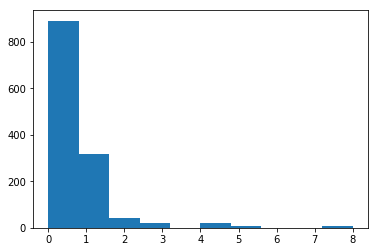

In [86]:
plt.hist(titanic['sibsp'])
plt.show()

(array([1210.,   62.,   28.,    9.]),
 array([0., 2., 4., 6., 8.]),
 <a list of 4 Patch objects>)

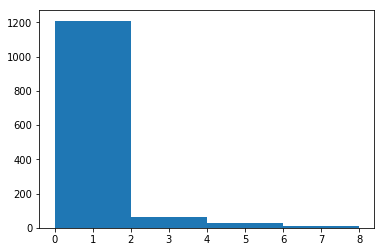

In [87]:
plt.hist(titanic['sibsp'], bins=4)

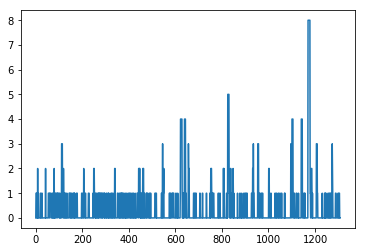

In [88]:
plt.plot(titanic['sibsp'])
plt.show()

In [89]:
x = titanic['sibsp']
y = titanic['parch']

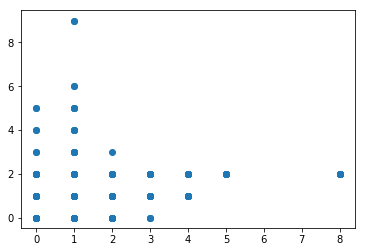

In [90]:
plt.scatter(x,y)
plt.show()

In [91]:
header = titanic.dtypes.index
print(header)

Index(['Unnamed: 0', 'pclass', 'survived', 'sex', 'age', 'sibsp', 'parch'], dtype='object')


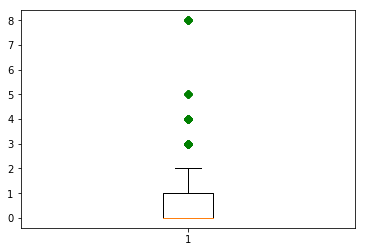

In [92]:
A = titanic['sibsp']
plt.boxplot(A,0,'gD')
plt.show()

In [93]:
corrMat = titanic.corr()
print(corrMat)

            Unnamed: 0       age     sibsp     parch
Unnamed: 0    1.000000  0.288172  0.065594  0.003584
age           0.288172  1.000000 -0.008303 -0.082531
sibsp         0.065594 -0.008303  1.000000  0.373587
parch         0.003584 -0.082531  0.373587  1.000000


In [94]:
covMat = titanic.cov()
print(covMat)

               Unnamed: 0           age      sibsp       parch
Unnamed: 0  142899.166667  4.353070e+05  25.828746    1.172783
age         435307.017778  1.596828e+07 -34.560258 -285.457563
sibsp           25.828746 -3.456026e+01   1.085052    0.336833
parch            1.172783 -2.854576e+02   0.336833    0.749195


# Credit One EDA

In [95]:
import pandas as pd

In [96]:
import numpy as np

In [97]:
credit = pd.read_csv('DefaultOfCreditCardClients.csv', header=1)

In [98]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [99]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [100]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

### Discretize Age

In [101]:
def round_down(num, divisor):
    return num - (num%divisor)

In [102]:
credit.AGE = round_down(credit.AGE,10)

### Discretize Limit_Bal

In [103]:
from collections import Counter

In [104]:
Counter(credit.LIMIT_BAL)

Counter({10000: 493,
         16000: 2,
         20000: 1976,
         30000: 1610,
         40000: 230,
         50000: 3365,
         60000: 825,
         70000: 731,
         80000: 1567,
         90000: 651,
         100000: 1048,
         110000: 588,
         120000: 726,
         130000: 729,
         140000: 749,
         150000: 1110,
         160000: 694,
         170000: 532,
         180000: 995,
         190000: 229,
         200000: 1528,
         210000: 730,
         220000: 469,
         230000: 737,
         240000: 619,
         250000: 350,
         260000: 521,
         270000: 238,
         280000: 493,
         290000: 348,
         300000: 554,
         310000: 272,
         320000: 312,
         327680: 1,
         330000: 173,
         340000: 217,
         350000: 231,
         360000: 881,
         370000: 71,
         380000: 156,
         390000: 174,
         400000: 271,
         410000: 78,
         420000: 168,
         430000: 83,
         440000: 83,

In [105]:
credit.LIMIT_BAL = round_down(credit.LIMIT_BAL,100000)

### Remove Spaces from columns names

In [106]:
credit.columns = [c.replace(' ', '_') for c in credit.columns]

In [107]:
import matplotlib.pyplot as plt

In [108]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')


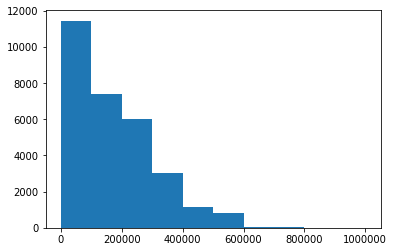

In [109]:
plt.hist(credit['LIMIT_BAL'])
plt.show()

(array([2.4883e+04, 4.1890e+03, 9.2500e+02, 3.0000e+00]),
 array([      0.,  250000.,  500000.,  750000., 1000000.]),
 <a list of 4 Patch objects>)

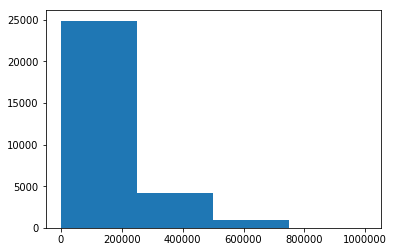

In [110]:
plt.hist(credit['LIMIT_BAL'], bins=4)

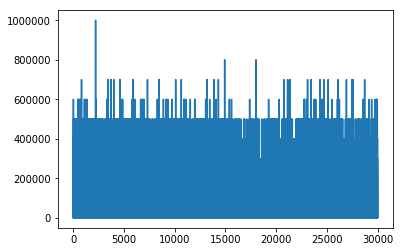

In [111]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

In [112]:
x = credit['PAY_0']
y = credit['PAY_2']

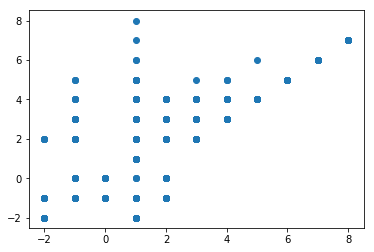

In [113]:
plt.scatter(x,y)
plt.show()

In [114]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')


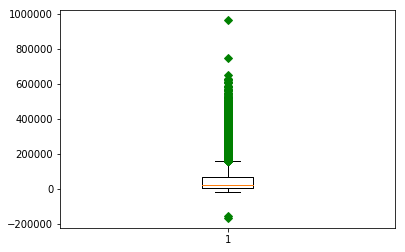

In [115]:
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

In [116]:
corrMat = credit.corr()
print(corrMat)

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.027711  0.018497   0.039177   
LIMIT_BAL                   0.027711   1.000000  0.017767  -0.215698   
SEX                         0.018497   0.017767  1.000000   0.014232   
EDUCATION                   0.039177  -0.215698  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.104018 -0.031389  -0.143464   
AGE                         0.019255   0.132096 -0.084366   0.173686   
PAY_0                      -0.030575  -0.263959 -0.057643   0.105364   
PAY_2                      -0.011215  -0.287221 -0.070771   0.121566   
PAY_3                      -0.018494  -0.276089 -0.066096   0.114025   
PAY_4                      -0.002735  -0.257555 -0.060173   0.108793   
PAY_5                      -0.022199  -0.239191 -0.055064   0.097520   
PAY_6                      -0.020270  -0.227140 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.268680 -0.033642   0.02

In [117]:
covMat = credit.cov()
print(covMat)

                                      ID     LIMIT_BAL          SEX  \
ID                          7.500250e+07  3.219259e+07    78.356379   
LIMIT_BAL                   3.219259e+07  1.799451e+10  1165.759748   
SEX                         7.835638e+01  1.165760e+03     0.239247   
EDUCATION                   2.681543e+02 -2.286831e+04     0.005502   
MARRIAGE                   -1.314525e+02 -7.283216e+03    -0.008014   
AGE                         1.623991e+03  1.725679e+05    -0.401878   
PAY_0                      -2.975726e+02 -3.979205e+04    -0.031685   
PAY_2                      -1.162770e+02 -4.612627e+04    -0.041442   
PAY_3                      -1.916922e+02 -4.432662e+04    -0.038694   
PAY_4                      -2.769132e+01 -4.039294e+04    -0.034411   
PAY_5                      -2.178600e+02 -3.635936e+04    -0.030521   
PAY_6                      -2.018774e+02 -3.503938e+04    -0.024754   
BILL_AMT1                   1.236447e+07  2.653960e+09 -1211.694332   
BILL_A

### Default Rates

In [118]:
np.mean(credit.default_payment_next_month)

0.2212

In [119]:
credit.groupby(['default_payment_next_month']).mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default_payment_next_month,,,,,,,,,,,,,,,,,,,,,
0,15064.893982,136860.126691,1.614150,1.841337,1.558637,30.780260,-0.211222,-0.301917,-0.316256,-0.355633,...,47533.365605,43611.165254,40530.445343,39042.268704,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,14773.781947,90039.180229,1.567058,1.894665,1.528029,31.125678,0.668174,0.458258,0.362116,0.254521,...,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


In [120]:
print(credit.groupby(['SEX'])['default_payment_next_month'].mean())

SEX
1    0.241672
2    0.207763
Name: default_payment_next_month, dtype: float64


In [121]:
print(credit.groupby(['EDUCATION'])['default_payment_next_month'].mean())

EDUCATION
0    0.000000
1    0.192348
2    0.237349
3    0.251576
4    0.056911
5    0.064286
6    0.156863
Name: default_payment_next_month, dtype: float64


In [122]:
print(credit.groupby(['MARRIAGE'])['default_payment_next_month'].mean())

MARRIAGE
0    0.092593
1    0.234717
2    0.209283
3    0.260062
Name: default_payment_next_month, dtype: float64


In [123]:
print(credit.groupby(['LIMIT_BAL'])['default_payment_next_month'].mean())

LIMIT_BAL
0          0.297991
100000     0.207703
200000     0.163600
300000     0.148586
400000     0.125545
500000     0.114046
600000     0.093750
700000     0.107143
800000     0.000000
1000000    0.000000
Name: default_payment_next_month, dtype: float64


### Applied Example

In [124]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

default_payment_next_month
0    23364
1     6636
Name: default_payment_next_month, dtype: int64

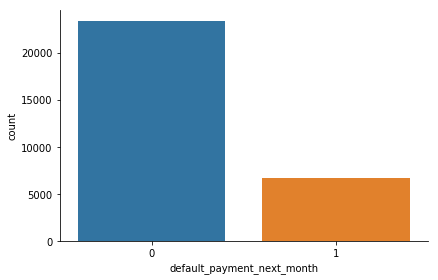

In [125]:
fg = sns.factorplot('default_payment_next_month', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('default_payment_next_month')
credit.groupby('default_payment_next_month')['default_payment_next_month'].count()

### LIMIT_BAL

LIMIT_BAL
0          11450
100000      7400
200000      6033
300000      3042
400000      1147
500000       833
600000        64
700000        28
800000         2
1000000        1
Name: LIMIT_BAL, dtype: int64

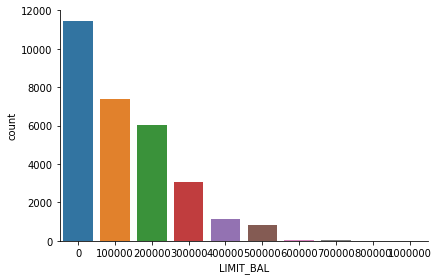

In [126]:
fg = sns.factorplot('LIMIT_BAL', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('LIMIT_BAL')
credit.groupby('LIMIT_BAL')['LIMIT_BAL'].count()

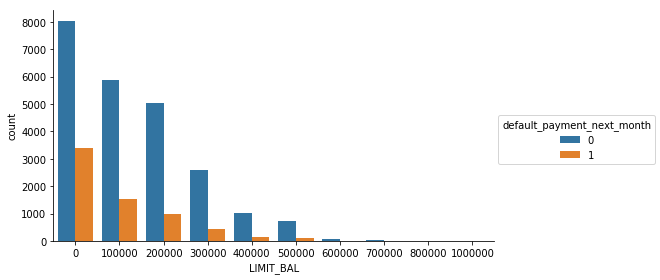

In [127]:
g = sns.factorplot('LIMIT_BAL', data=credit, hue='default_payment_next_month', kind='count', aspect=1.75)
g.set_xlabels('LIMIT_BAL')

In [140]:
balance = credit['LIMIT_BAL'].dropna()

Text(0.5,1,"Distribution of Customers' Balance Limit")

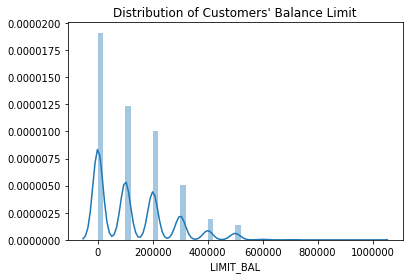

In [141]:
balance_dist = sns.distplot(balance)
balance_dist.set_title("Distribution of Customers' Balance Limit")

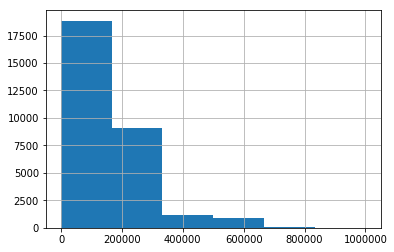

In [142]:
credit['LIMIT_BAL'].hist(bins=6)

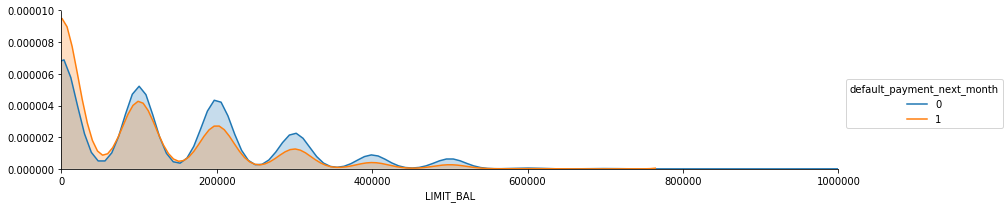

In [152]:
fig = sns.FacetGrid(credit, hue='default_payment_next_month', aspect=4)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
oldest = credit['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

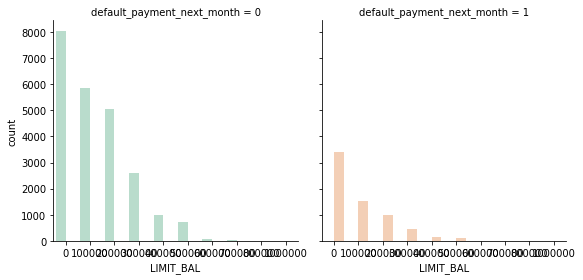

In [172]:
sns.factorplot('LIMIT_BAL', data=credit, hue='default_payment_next_month', kind='count', palette='Pastel2', hue_order=range(0,2),
              col='default_payment_next_month')

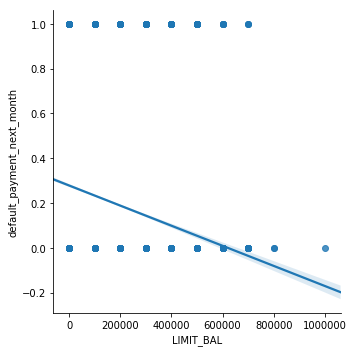

In [177]:
sns.lmplot('LIMIT_BAL', 'default_payment_next_month', data=credit)

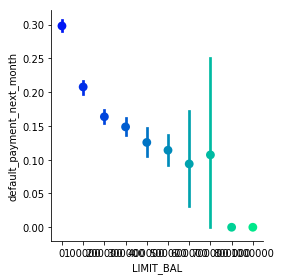

In [184]:
sns.factorplot('LIMIT_BAL', 'default_payment_next_month', data=credit, palette='winter')

### EDUCATION

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

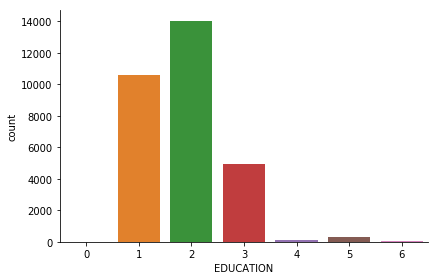

In [128]:
fg = sns.factorplot('EDUCATION', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('EDUCATION')
credit.groupby('EDUCATION')['EDUCATION'].count()

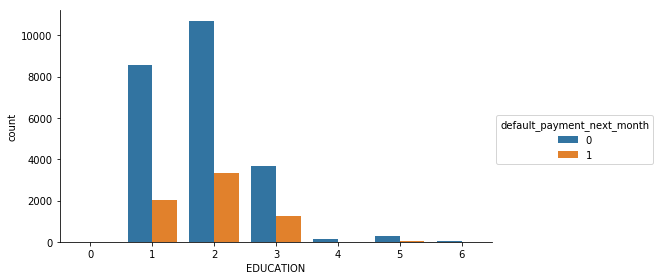

In [129]:
g = sns.factorplot('EDUCATION', data=credit, hue='default_payment_next_month', kind='count', aspect=1.75)
g.set_xlabels('EDUCATION')

In [143]:
education = credit['EDUCATION'].dropna()

Text(0.5,1,"Distribution of Customers' Education")

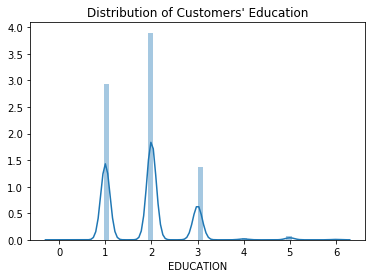

In [144]:
education_dist = sns.distplot(education)
education_dist.set_title("Distribution of Customers' Education")

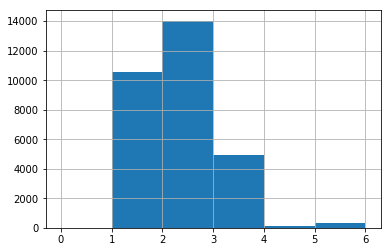

In [145]:
credit['EDUCATION'].hist(bins=6)

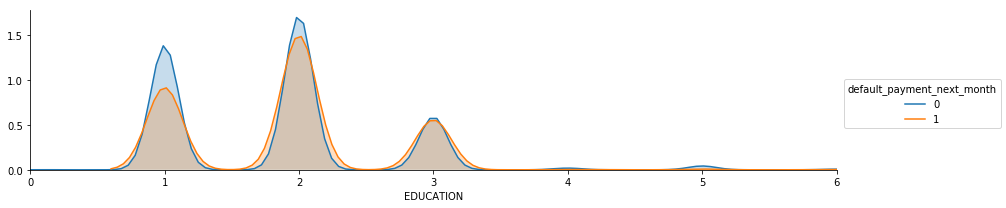

In [150]:
fig = sns.FacetGrid(credit, hue='default_payment_next_month', aspect=4)
fig.map(sns.kdeplot, 'EDUCATION', shade=True)
oldest = credit['EDUCATION'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

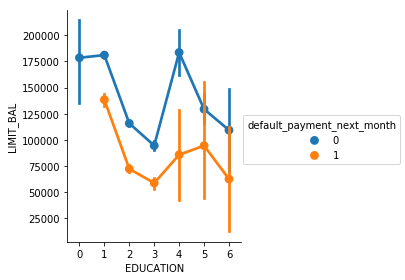

In [163]:
sns.factorplot('EDUCATION','LIMIT_BAL', hue='default_payment_next_month', data=credit, order=range(0,7), 
               hue_order = [0,1])

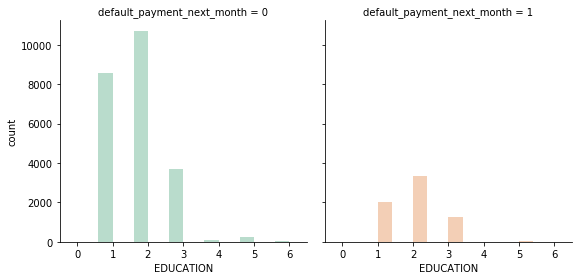

In [170]:
sns.factorplot('EDUCATION', data=credit, hue='default_payment_next_month', kind='count', palette='Pastel2', hue_order=range(0,2),
              col='default_payment_next_month')

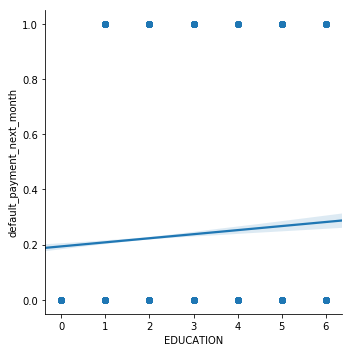

In [174]:
sns.lmplot('EDUCATION', 'default_payment_next_month', data=credit)

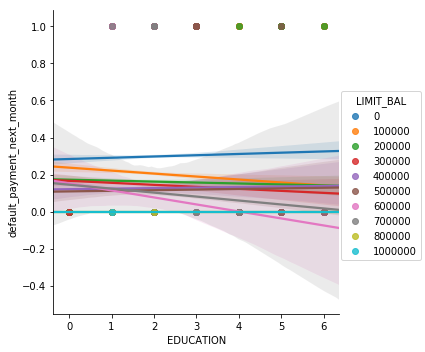

In [180]:
sns.lmplot('EDUCATION', 'default_payment_next_month', data=credit, hue='LIMIT_BAL')

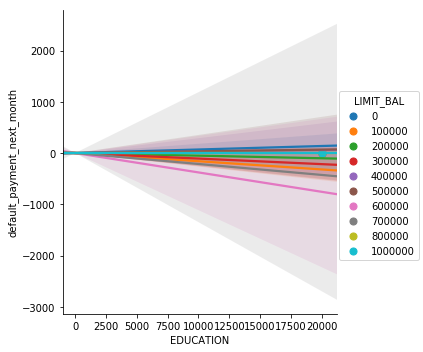

In [183]:
generations = [20000,40000,60000,80000,100000]
sns.lmplot('EDUCATION','default_payment_next_month',hue='LIMIT_BAL',data=credit,x_bins=generations, hue_order=[0,  100000,  200000,  300000,  400000,  500000,  600000,
        700000,  800000, 1000000])

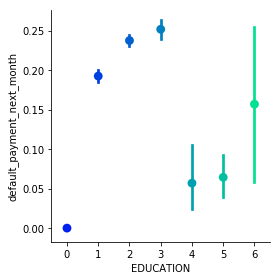

In [185]:
sns.factorplot('EDUCATION', 'default_payment_next_month', data=credit, palette='winter')

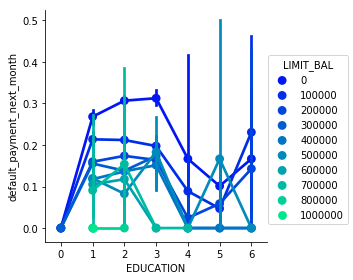

In [189]:
sns.factorplot('EDUCATION', 'default_payment_next_month', data=credit, palette='winter', hue='LIMIT_BAL', 
               hue_order=[0,  100000,  200000,  300000,  400000,  500000,  600000,
        700000,  800000, 1000000])

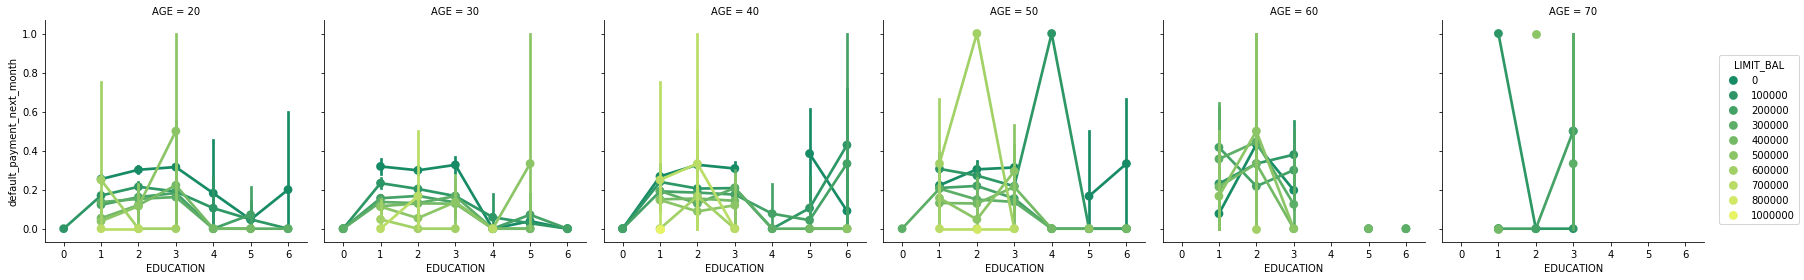

In [192]:
sns.factorplot('EDUCATION', 'default_payment_next_month', data=credit, palette='summer', hue='LIMIT_BAL', 
               hue_order=[0,  100000,  200000,  300000,  400000,  500000,  600000,
        700000,  800000, 1000000], col='AGE', col_order=[20, 30, 40, 50, 60, 70])

### MARRIAGE

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

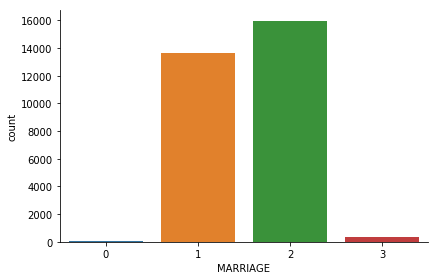

In [130]:
fg = sns.factorplot('MARRIAGE', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('MARRIAGE')
credit.groupby('MARRIAGE')['MARRIAGE'].count()

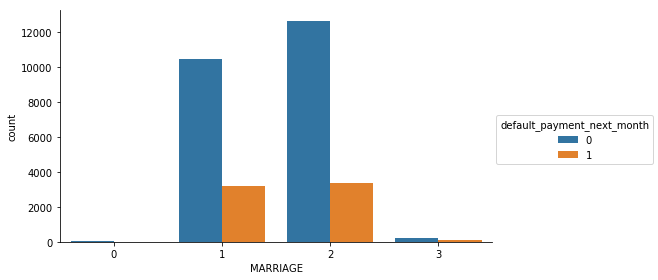

In [131]:
g = sns.factorplot('MARRIAGE', data=credit, hue='default_payment_next_month', kind='count', aspect=1.75)
g.set_xlabels('MARRIAGE')

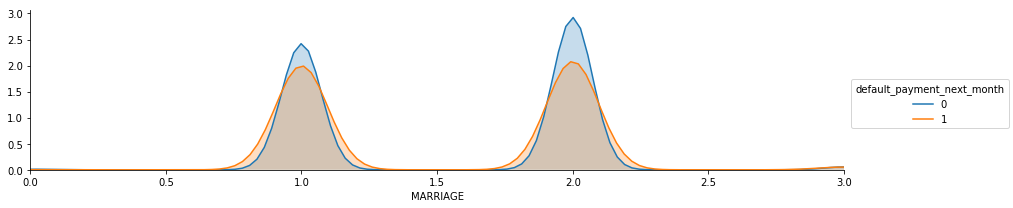

In [151]:
fig = sns.FacetGrid(credit, hue='default_payment_next_month', aspect=4)
fig.map(sns.kdeplot, 'MARRIAGE', shade=True)
oldest = credit['MARRIAGE'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

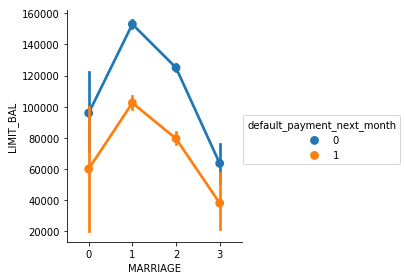

In [162]:
sns.factorplot('MARRIAGE','LIMIT_BAL', hue='default_payment_next_month', data=credit, order=range(0,4), 
               hue_order = [0,1])

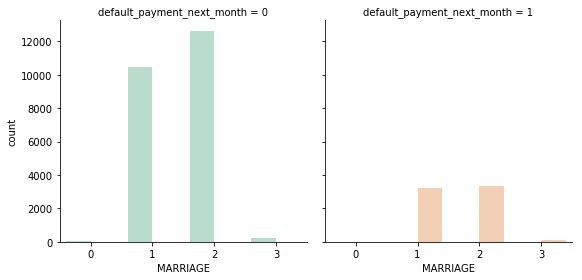

In [168]:
sns.factorplot('MARRIAGE', data=credit, hue='default_payment_next_month', kind='count', palette='Pastel2', hue_order=range(0,2),
              col='default_payment_next_month')

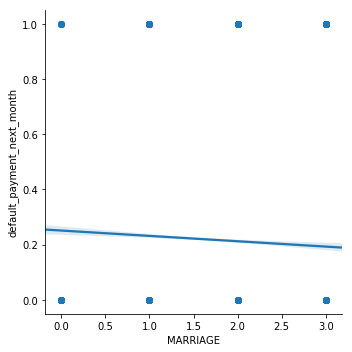

In [176]:
sns.lmplot('MARRIAGE', 'default_payment_next_month', data=credit)

### AGE

AGE
20     9618
30    11238
40     6464
50     2341
60      314
70       25
Name: AGE, dtype: int64

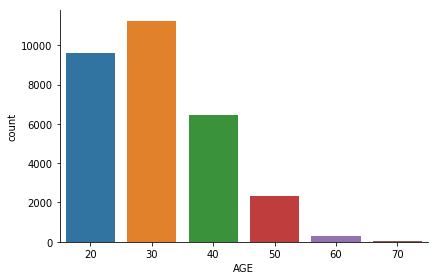

In [132]:
fg = sns.factorplot('AGE', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('AGE')
credit.groupby('AGE')['AGE'].count()

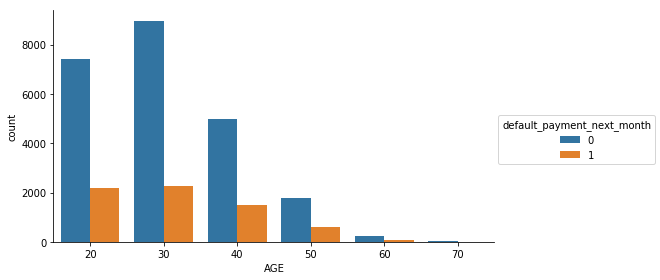

In [133]:
g = sns.factorplot('AGE', data=credit, hue='default_payment_next_month', kind='count', aspect=1.75)
g.set_xlabels('AGE')

In [137]:
age = credit['AGE'].dropna()

Text(0.5,1,"Distribution of Customers' Ages")

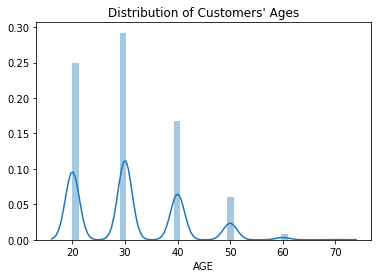

In [138]:
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Customers' Ages")

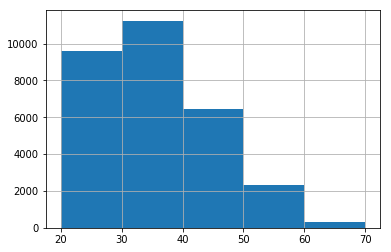

In [139]:
credit['AGE'].hist(bins=5)

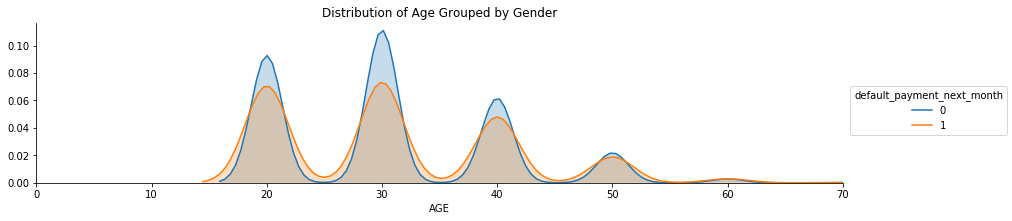

In [148]:
fig = sns.FacetGrid(credit, hue='default_payment_next_month', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

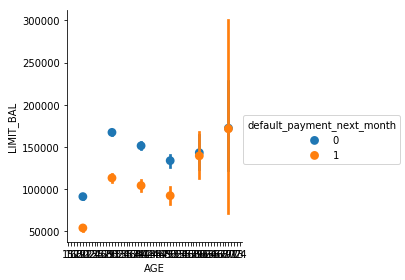

In [157]:
sns.factorplot('AGE','LIMIT_BAL', hue='default_payment_next_month', data=credit, order=range(15,75), 
               hue_order = [0,1])

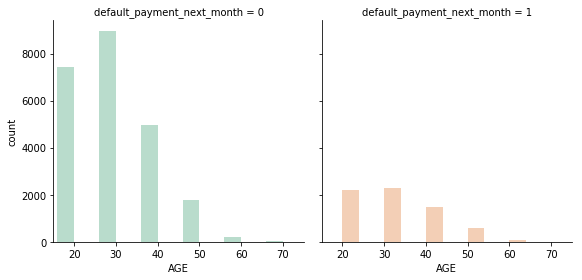

In [169]:
sns.factorplot('AGE', data=credit, hue='default_payment_next_month', kind='count', palette='Pastel2', hue_order=range(0,2),
              col='default_payment_next_month')

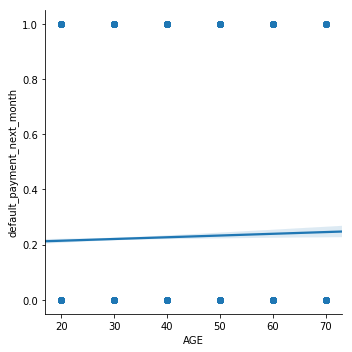

In [173]:
sns.lmplot('AGE', 'default_payment_next_month', data=credit)

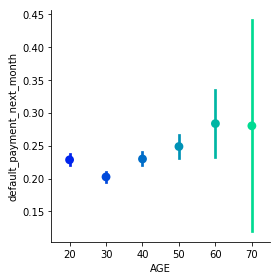

In [186]:
sns.factorplot('AGE', 'default_payment_next_month', data=credit, palette='winter')

### SEX

SEX
1    11888
2    18112
Name: SEX, dtype: int64

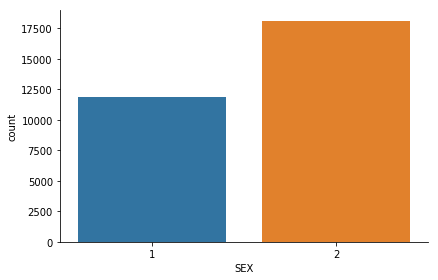

In [134]:
fg = sns.factorplot('SEX', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('SEX')
credit.groupby('SEX')['SEX'].count()

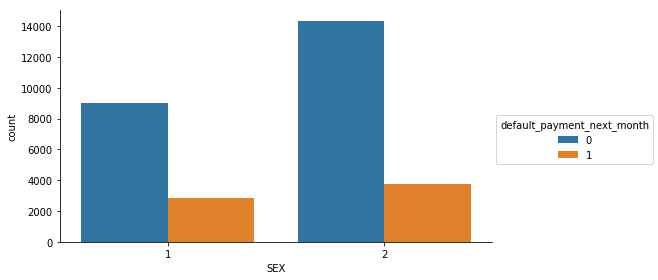

In [135]:
g = sns.factorplot('SEX', data=credit, hue='default_payment_next_month', kind='count', aspect=1.75)
g.set_xlabels('SEX')

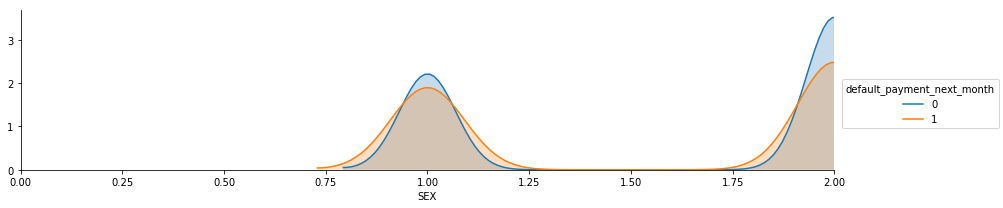

In [149]:
fig = sns.FacetGrid(credit, hue='default_payment_next_month', aspect=4)
fig.map(sns.kdeplot, 'SEX', shade=True)
oldest = credit['SEX'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

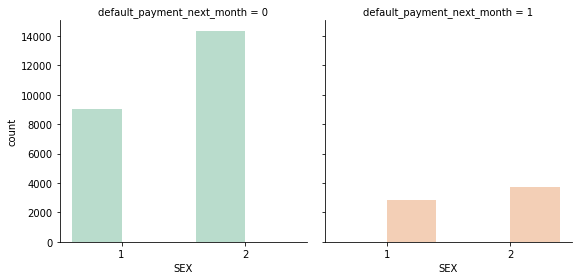

In [171]:
sns.factorplot('SEX', data=credit, hue='default_payment_next_month', kind='count', palette='Pastel2', hue_order=range(0,2),
              col='default_payment_next_month')

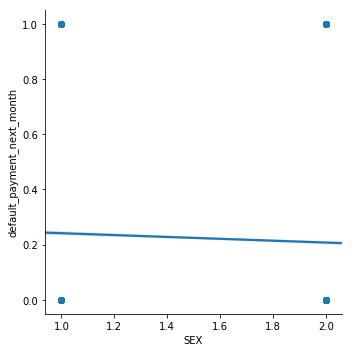

In [175]:
sns.lmplot('SEX', 'default_payment_next_month', data=credit)

### Age and Education

In [136]:
credit.pivot_table('default_payment_next_month', 'AGE', 'EDUCATION', aggfunc=np.sum, margins=True)

EDUCATION,0,1,2,3,4,5,6,All
AGE,,,,,,,,
20,0.0,698.0,1229.0,261.0,4.0,4.0,1.0,2197
30,0.0,827.0,1138.0,305.0,1.0,5.0,0.0,2276
40,0.0,363.0,706.0,402.0,1.0,8.0,5.0,1485
50,0.0,123.0,221.0,234.0,1.0,1.0,2.0,582
60,NaN,23.0,35.0,31.0,NaN,0.0,0.0,89
70,NaN,2.0,1.0,4.0,NaN,NaN,NaN,7
All,0.0,2036.0,3330.0,1237.0,7.0,18.0,8.0,6636


### Education and Limit Bal

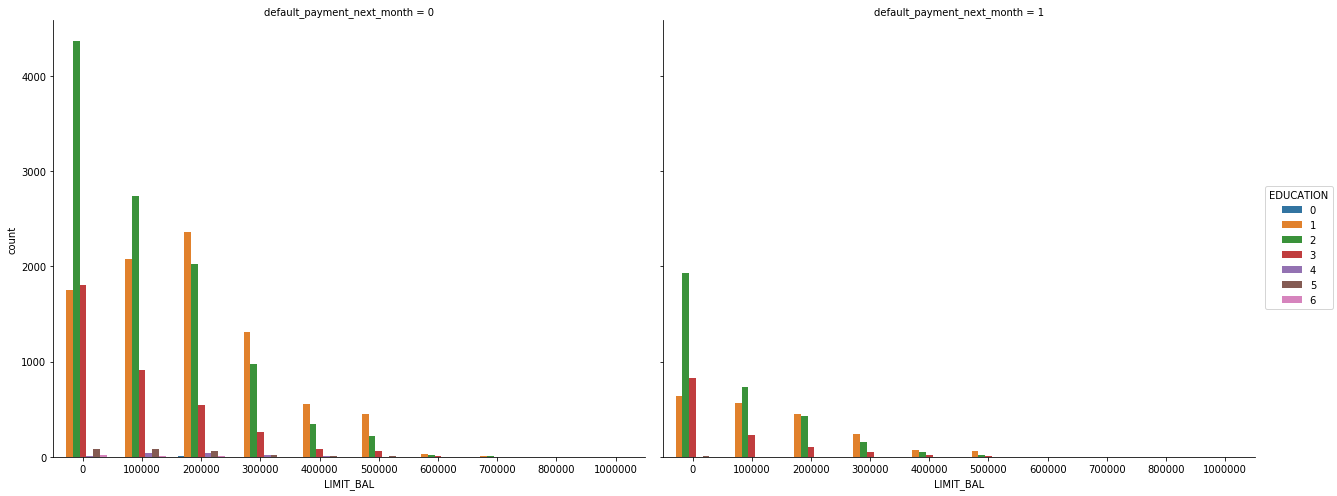

In [146]:
sns.factorplot('LIMIT_BAL', data=credit, kind='count', hue='EDUCATION', col='default_payment_next_month', order=[0,  100000,  200000,  300000,  400000,  500000,  600000,
        700000,  800000, 1000000], 
               hue_order=[0, 1, 2, 3, 4, 5, 6], aspect=1.25, size=7)